In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
raw_data = pd.read_csv('uci-secom.csv')

In [5]:
len(raw_data)

1567

In [6]:
null = []
Not_null = []
null = raw_data.isnull().sum()

In [7]:
for i in null.index:
    if null[i] == 0:
        Not_null.append(i)

In [8]:
null = null.drop(Not_null)

In [9]:
null_20 = []
for i in null.index:
    if null[i] < 52:
        null_20.append(i)
null = null.drop(null_20)

In [10]:
data = raw_data.copy()

In [11]:
data = data.drop(null.index,axis=1)

In [12]:
data.replace(np.nan, data.median(), inplace=True)

In [13]:
data.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '577', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=540)

In [14]:
unique_columns = []
for i in data.columns:
    tmp =  data[i].unique() # data[i].unique()
    if len(tmp) == 1:
        unique_columns.append(i)

In [15]:
len(unique_columns)

116

In [16]:
data = data.drop(unique_columns, axis=1)

In [17]:
data.head(5)

,Time,0,1,2,3,4,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005,-1
1,2008-07-19 12:32,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [19]:
data = data.drop('Time', axis=1)

In [22]:
data.to_csv("전처리 후 data.csv")

In [20]:
X = data.loc[:,'0':'589']
y = data.loc[:,'Pass/Fail']

## 정규화

- StandardScaler : 이상치에 약함
- RoboustScaler: 이상치에 강함 
- minmaxScaler

In [20]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

### 다양한 표준화, 정규화 방법 적용 및 성능 비교

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
def get_clf_eval(y_test,pred):
  acc = accuracy_score(y_test,pred)
  pre = precision_score(y_test,pred)
  re = recall_score(y_test, pred)
  f1 = f1_score(y_test,pred)
  auc = roc_auc_score(y_test,pred)

  return acc,pre,re,f1,auc

In [36]:
def print_clf_eval(y_test,pred):
  confusion = confusion_matrix(y_test,pred)
  acc,pre,re,f1,auc = get_clf_eval(y_test,pred)

  print('=>오차행렬')
  print(confusion)
  print('=============')
  print('정확도(acc) : {0:.4f}, 정밀도(pre) : {1:.4f}'.format(acc,pre))
  print('재현율(re) : {0:.4f}, F1 : {1:.4f}, AUC : {2:.4f}'.format(re,f1,auc))

#### MinMaxScaler()

In [24]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [25]:
x_minmax = min_max_scaler.fit_transform(X)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

random_state = []


X_train,X_test,y_train,y_test=train_test_split(x_minmax,y,test_size=0.2,random_state= 13,stratify=y)
log_reg = LogisticRegression(random_state=13,solver='liblinear',C=10.0)
log_reg.fit(X_train, y_train)
pred_proba_1 = log_reg.predict_proba(X_test)[:,1]
auc_test = roc_auc_score(y_test, pred_proba_1)
print('auc_test =', auc_test)
print('')

auc_test = 0.7594669267024216



In [45]:
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test=train_test_split(x_minmax,y,test_size=0.2,random_state= 13,stratify=y)
dt_clf = DecisionTreeClassifier(random_state=13,max_depth=2)
dt_clf.fit(X_train, y_train)

pred_proba_1 = dt_clf.predict_proba(X_test)[:,1]
auc_test = roc_auc_score(y_test, pred_proba_1)
print('auc_test =', auc_test)
print('')

auc_test = 0.6151470827238745



#### StandardScaler()

In [28]:
X = data.loc[:,'0':'589']
y = data.loc[:,'Pass/Fail']

In [31]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [32]:
x_std = std_scaler.fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler


X_train,X_test,y_train,y_test=train_test_split(x_std,y,test_size=0.2,random_state= 13,stratify=y)
log_reg = LogisticRegression(random_state=13,solver='liblinear',C=10.0)
log_reg.fit(X_train, y_train)

pred_proba_1 = log_reg.predict_proba(X_test)[:,1]
auc_test = roc_auc_score(y_test, pred_proba_1)
print('auc_test =', auc_test)
print('')

auc_test = 0.7098976109215016



In [44]:
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test=train_test_split(x_std,y,test_size=0.2,random_state= 13,stratify=y)
dt_clf = DecisionTreeClassifier(random_state=13,max_depth=2)
dt_clf.fit(X_train, y_train)

pred_proba_2 = dt_clf.predict_proba(X_test)[:,1]
auc_test = roc_auc_score(y_test, pred_proba_2)
print('auc_test =', auc_test)
print('')

auc_test = 0.6151470827238745



#### RobustScaler()

In [35]:
X = data.loc[:,'0':'589']
y = data.loc[:,'Pass/Fail']

In [36]:
robust_scaler = RobustScaler()

In [38]:
x_robust = robust_scaler.fit_transform(X)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

random_state = []

for j in range(1,101): 
    random_state.append(j)
ai = []
for rand in random_state:
  X_train,X_test,y_train,y_test=train_test_split(x_robust,y,test_size=0.2,random_state= rand,stratify=y)
  log_reg = LogisticRegression(random_state=13,solver='liblinear',C=10.0)
  log_reg.fit(X_train, y_train)
  pred_proba_1 = log_reg.predict_proba(X_test)[:,1]
  auc_test = roc_auc_score(y_test, pred_proba_1)
  print('random_state=', rand,'  ' ,'auc_test =', auc_test)
  print('')
  ai.append(auc_test)
print("평균 = ", np.mean(ai))

C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 1    auc_test = 0.6346497643425971



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 2    auc_test = 0.714448236632537



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 3    auc_test = 0.7094100438810337

random_state= 4    auc_test = 0.641719486429384



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 5    auc_test = 0.5870307167235495



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 6    auc_test = 0.6630911750365676



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 7    auc_test = 0.5161709735088574



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 8    auc_test = 0.7105477003087923



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 9    auc_test = 0.6235169835852429



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 10    auc_test = 0.6905574516496018



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 11    auc_test = 0.5551763367463026



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 12    auc_test = 0.7017714935803673



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 13    auc_test = 0.6296928327645052



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 14    auc_test = 0.6663416219730213



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 15    auc_test = 0.7398017227368763



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 16    auc_test = 0.6725174711522834



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 17    auc_test = 0.6296115715910937



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 18    auc_test = 0.6922639362912401



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 19    auc_test = 0.6970583455225094



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 20    auc_test = 0.6634162197302129



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 21    auc_test = 0.49902486591906386



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 22    auc_test = 0.6013326832439462



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 23    auc_test = 0.6395254347472777



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 24    auc_test = 0.6876320494067935



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 25    auc_test = 0.747765317731188



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 26    auc_test = 0.6684544124817162



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 27    auc_test = 0.6328620185275475



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 28    auc_test = 0.6128717698683569



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 29    auc_test = 0.5998699821225418



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 30    auc_test = 0.616447261498456



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 31    auc_test = 0.7198114740776856



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 32    auc_test = 0.6447261498456038



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 33    auc_test = 0.6850316918576305



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 34    auc_test = 0.6426133593369088



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 35    auc_test = 0.6231106777181863



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 36    auc_test = 0.6627661303429221



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 37    auc_test = 0.5811799122379327



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 38    auc_test = 0.6431009263773769



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 39    auc_test = 0.7328132618235008



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 40    auc_test = 0.7674305216967333



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 41    auc_test = 0.6146595156834065



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 42    auc_test = 0.6598407281001137



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 43    auc_test = 0.6125467251747114



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 44    auc_test = 0.6293677880708598



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 45    auc_test = 0.5820737851454575



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 46    auc_test = 0.7163985047944091



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 47    auc_test = 0.5828051357061595



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 48    auc_test = 0.6910450186900698



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 49    auc_test = 0.7716561027141232



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 50    auc_test = 0.7266374126442385



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 51    auc_test = 0.7141231919388916



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 52    auc_test = 0.6578904599382415



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 53    auc_test = 0.6398504794409231



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 54    auc_test = 0.5550138143994798



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 55    auc_test = 0.5460750853242321



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 56    auc_test = 0.6548025353486104



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 57    auc_test = 0.6964082561352186



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 58    auc_test = 0.573703884284089

random_state= 59    auc_test = 0.5913375589143508

random_state= 60    auc_test = 0.6141719486429383



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 61    auc_test = 0.6629286526897449



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 62    auc_test = 0.6023078173248821



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 63    auc_test = 0.7225743539736713



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 64    auc_test = 0.7211116528522672



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 65    auc_test = 0.6343247196489518



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 66    auc_test = 0.6876320494067933



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 67    auc_test = 0.7120104014301967



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 68    auc_test = 0.7058345522509345



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 69    auc_test = 0.7269624573378839



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 70    auc_test = 0.7059970745977573



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 71    auc_test = 0.5990573703884284



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 72    auc_test = 0.6199414919551438



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 73    auc_test = 0.6569153258573053



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 74    auc_test = 0.7116853567365512



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 75    auc_test = 0.6312367950593206



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 76    auc_test = 0.7284251584592881



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 77    auc_test = 0.625873557614172



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 78    auc_test = 0.6195351860880871



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 79    auc_test = 0.559076873070047



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 80    auc_test = 0.6326994961807249



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 81    auc_test = 0.599219892735251



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 82    auc_test = 0.5901999024865919



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 83    auc_test = 0.6756053957419146



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 84    auc_test = 0.6790183650251909



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 85    auc_test = 0.6899886234357224



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 86    auc_test = 0.6000325044693645



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 87    auc_test = 0.6819437672679993



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 88    auc_test = 0.6954331220542825



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 89    auc_test = 0.640988135868682



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 90    auc_test = 0.638875345359987



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 91    auc_test = 0.6916951080773606



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 92    auc_test = 0.7440273037542662



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 93    auc_test = 0.6307492280188526



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 94    auc_test = 0.5907687307004714



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 95    auc_test = 0.5988948480416058



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 96    auc_test = 0.5944254835039818



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 97    auc_test = 0.673330082886397



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 98    auc_test = 0.6780432309442548



C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


random_state= 99    auc_test = 0.6970583455225093

random_state= 100    auc_test = 0.6673167560539575

평균 =  0.6530131643100927


C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


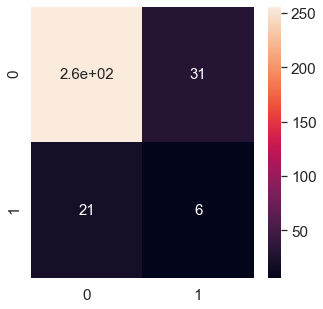

In [105]:
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

# Y축: 실제 값, X축: 예측 값
# 실제 값이 1인데 예측도 1로 한 경우는 5개 

## >> 결론: StandardScaler(), LogisticRegression 사용

In [76]:
# x_std
# y

In [77]:
y.value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

## 성능비교 (raw_data 에 정규화 진행)

### standardScaler
- accuracy score 0.8694267515923567
- precision_score 0.09908980105370763
- recall_score 0.20833333333333334
- f1_score 0.19607843137254902

## 클래스 불균형 해결

- 언더샘플링
- 오버샘플링
- 언더 샘플링 + 오버샘플링

In [108]:
## StandardScaler: 평균과 표준편차 사용. (값이 꼭 0과 1 사이는 아님)

In [109]:
# data = pd.concat([pd.DataFrame(std_data),pd.DataFrame(y)], axis=1)

In [118]:
# 정규화한 데이터 넣음 
# data.head()

In [11]:
# deleting the first column

data = raw_data.drop(columns = ['Time'], axis = 1)

# checking the shape of the data after deleting a column
data.shape

(1567, 591)

### 언더샘플링

In [137]:
# Under Sampling
failed_tests = np.array(data[data['Pass/Fail'] == 1].index)
no_failed_tests = len(failed_tests)

print(no_failed_tests)

104


In [138]:
normal_indices = data[data['Pass/Fail'] == -1]
no_normal_indices = len(normal_indices)

print(no_normal_indices)

1463


In [139]:
random_normal_indices = np.random.choice(no_normal_indices, size = no_failed_tests, replace = True)
random_normal_indices = np.array(random_normal_indices)

print(len(random_normal_indices))

104


In [140]:
under_sample = np.concatenate([failed_tests, random_normal_indices])
print(len(under_sample))

208


In [144]:
# creating the undersample data

undersample_data = data.iloc[under_sample, :]

In [145]:
undersample_data

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.860200,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
10,2994.05,2548.21,2195.1222,1046.1468,1.3204,100.0,103.3400,0.1223,1.5144,-0.0190,...,57.812200,0.4925,0.0158,0.0041,3.2115,0.0355,0.0205,0.0071,57.8122,1
11,2928.84,2479.40,2196.2111,1605.7578,0.9959,100.0,97.9156,0.1257,1.4690,0.0170,...,75.507700,0.4987,0.0427,0.0092,8.5646,0.0370,0.0279,0.0081,75.5077,1
14,2963.97,2629.48,2224.6222,947.7739,1.2924,100.0,104.8489,0.1197,1.4474,0.0144,...,142.908000,0.5077,0.0094,0.0026,1.8483,0.0202,0.0289,0.0084,142.9080,1
23,2884.74,2514.54,2160.3667,899.9488,1.4022,100.0,105.4978,0.1240,1.5585,-0.0317,...,216.886900,0.4982,0.0099,0.0027,1.9771,0.0098,0.0213,0.0077,216.8869,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,2992.52,2470.14,2197.6444,1247.0334,0.7865,100.0,99.9211,0.1203,1.4703,0.0275,...,59.384000,0.5047,0.0093,0.0033,1.8502,0.0214,0.0127,0.0035,59.3840,-1
1349,3001.74,2446.55,2207.9555,1283.4368,1.8467,100.0,95.4022,0.1216,1.3997,0.0008,...,97.934373,0.5031,0.0077,0.0022,1.5296,0.0097,0.0098,0.0030,101.2092,-1
170,2908.06,2465.07,2221.9444,1551.6947,1.5296,100.0,99.2678,0.1222,1.4435,-0.0119,...,47.812300,0.5045,0.0095,0.0025,1.8872,0.0240,0.0115,0.0035,47.8123,-1
305,3020.71,2483.52,2201.5777,976.4791,0.7679,100.0,99.9956,0.1202,1.3800,-0.0218,...,97.934373,0.5051,0.0143,0.0035,2.8311,0.0187,0.0108,0.0033,58.0827,-1


In [146]:
# splitting the undersample dataset into x and y sets

x = undersample_data.iloc[:, undersample_data.columns != 'Pass/Fail'] 
y = undersample_data.iloc[:, undersample_data.columns == 'Pass/Fail']

print(x.shape)
print(y.shape)

(208, 590)
(208, 1)


In [147]:
from sklearn.model_selection import train_test_split

x_train_us, x_test_us, y_train_us, y_test_us = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train_us.shape)
print(y_train_us.shape)
print(x_test_us.shape)
print(y_test_us.shape)

(166, 590)
(166, 1)
(42, 590)
(42, 1)


In [159]:
y_test_us['Pass/Fail'].value_counts()
# -1은 정상, +1은 불량 

 1    24
-1    18
Name: Pass/Fail, dtype: int64

### 언더샘플링 후 정규화

In [149]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train_us)
x_test = sc.transform(x_test_us)

In [150]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=13, solver='liblinear')
log_reg.fit(x_train_us, y_train_us)

y_pred = log_reg.predict(x_test_us)

C:\Users\Itshony\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


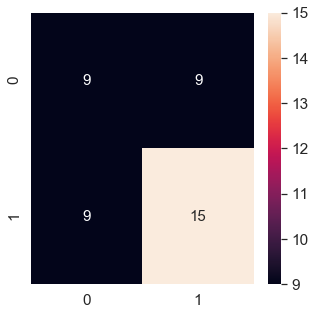

In [151]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_us, y_pred)


plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

# 0 = -1 = 정상, 1 = +1 = 불량 

### 언더샘플링 해석
- 1. 불량을 더 잘 분류
- 2. 하지만 불량도 정상도 잘 분류해내지 못함 

### 오버 샘플링

In [1]:
from imblearn.over_sampling import SMOTE

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
# separating the dependent and independent data
x = data.iloc[:,:590]
y = data.iloc[:, 590]

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 590)
shape of y: (1567,)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 13)

In [72]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_sample(X_train, y_train.values.ravel())

print(x_resample.shape)
print(y_resample.shape)

(2352, 590)
(2352,)


In [73]:
from sklearn.model_selection import train_test_split

x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

print(x_train_os.shape)
print(y_train_os.shape)
print(x_test_os.shape)
print(y_test_os.shape)

(1881, 590)
(1881,)
(471, 590)
(471,)


### 정상 불량 별 갯수 - train data set 

In [74]:
unique, counts = np.unique(y_train_os, return_counts=True)

In [75]:
dict(zip(unique, counts))

{-1: 942, 1: 939}

### 정상 불량 별 갯수 - test data set 

In [76]:
unique, counts = np.unique(y_test_os, return_counts=True)

In [77]:
dict(zip(unique, counts))

{-1: 234, 1: 237}

In [78]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_os = sc.fit_transform(x_train_os)
x_test_os = sc.transform(x_test_os)

In [79]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=13, solver='liblinear')
log_reg.fit(x_train_os, y_train_os)

y_pred = log_reg.predict(x_test_os)

### validation

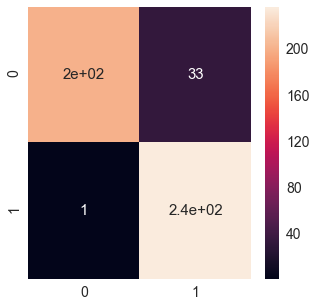

In [80]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_os, y_pred)


plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

# 0 = -1 = 정상, 1 = +1 = 불량 

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics import accuracy_score

print('accuracy score', accuracy_score(y_test_os, y_pred))
cm = confusion_matrix(y_test_os, y_pred, labels = [-1,1])
print('precision_score', average_precision_score(y_test_os, y_pred))
print('recall_score', recall_score(y_test_os, y_pred))
print('f1_score',f1_score(y_test_os, y_pred))

accuracy score 0.9278131634819533
precision_score 0.8757447757422882
recall_score 0.9957805907172996
f1_score 0.9328063241106721


In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
scores = cross_val_score(log_reg, x_resample, y_resample, cv = 5,scoring='f1_macro')
scores

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblin

array([0.91097699, 0.90604954, 0.88022426, 0.87856453, 0.88442833])

### test

In [85]:
y_pred_test = log_reg.predict(X_test)

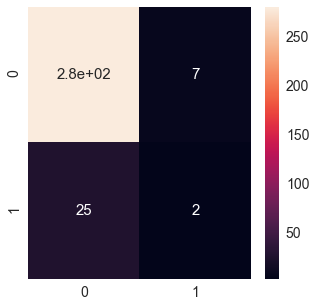

In [86]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)


plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

# 0 = -1 = 정상, 1 = +1 = 불량 

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics import accuracy_score

print('accuracy score', accuracy_score(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test, labels = [-1,1])
print('precision_score', average_precision_score(y_test, y_pred_test))
print('recall_score', recall_score(y_test, y_pred_test))
print('f1_score',f1_score(y_test, y_pred_test))

accuracy score 0.8980891719745223
precision_score 0.09607873974469869
recall_score 0.07407407407407407
f1_score 0.1111111111111111


### 오버샘플링 해석
- 0 = -1 = 정상, 1 = +1 = 불량 

#### validation 확인
- 오히려 정상을 잘 분류해준다 (307 중 45개를 잘못 분류)
- 그러나 불량을 잘 분류해준다. 

#### test 확인
- 하지만 test 확인 결과 오버피팅. 
- f1-score 가 너무 안 나옴

### >> 언더샘플링은 오히려 성능을 더 떨어뜨릴 것 같다. 
### >> 오버샘플링만은 답이 아님 다른 전처리 과정 후 오버샘플링, 언더 샘플링 같이 진행해도 좋을 것 같음

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
data = pd.read_csv("uci-secom_norm.csv")

In [17]:
X = data.loc[:,'0':'589']
y = data.loc[:,'Pass/Fail']

In [20]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size = 0.2, random_state=13)

In [21]:
log_reg = LogisticRegression(random_state=13,solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=13, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred = log_reg.predict(X_test)

### Roc

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [37]:
roc_auc  = roc_auc_score(y_test, log_reg.decision_function(X_test))

In [38]:
# decision_function: 불확실성을 추정 = 확률로 표현 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_reg.decision_function(X_test))

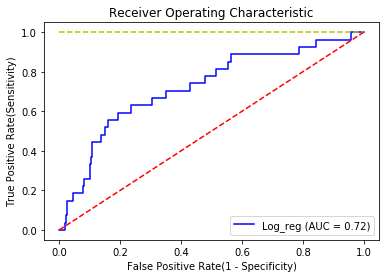

In [39]:
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Log_reg (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

### PCA 

In [40]:
from sklearn.decomposition import PCA 
pca = PCA()

- 차원을 축소하기 전에 훈련 세트의 분산을 95%로 유지하는 데 필요한 최소한의 차원 수 계산

In [42]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [43]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.95)+1 

In [45]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)

In [54]:
pd.DataFrame(X_reduced).head()

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,-0.572192,1.342328,0.228332,-4.396426,1.040192,0.668275,-2.287355,-1.328905,-2.874730,-1.322266,...,-1.801248,0.808397,1.294970,-1.800097,-0.859032,-0.375495,-0.616316,-0.359063,-0.015165,0.468712
1,0.485574,-1.141776,0.243781,-0.936086,0.366758,-0.063498,-1.808345,-4.077129,0.350519,-4.937790,...,-1.613310,-0.726289,-0.007445,-1.408605,0.851748,0.582335,0.527185,0.626662,-0.581502,0.264057
2,0.780410,-1.950361,-0.289944,1.653971,-0.398065,-0.179089,2.911551,1.883662,-1.940251,-0.431356,...,-0.333097,0.687374,-0.913463,-0.848254,-0.695524,-0.256944,-0.102403,-1.252506,2.716914,1.366516
3,-0.791111,-3.345710,-0.182575,2.267048,-1.026086,-2.454650,-3.160582,0.896193,1.926859,-1.266678,...,-0.581805,-1.063355,0.355531,-1.422822,-0.112665,1.078162,0.041553,-0.806740,-0.325634,0.065048
4,1.286133,-0.464612,-0.235039,0.782468,0.112255,-3.050975,-6.258849,0.712762,0.111945,-1.254833,...,0.437675,-0.899334,0.145751,-0.204881,0.409104,0.420025,-0.904584,0.054091,1.312060,-0.078999


### 하나의 값만 가지고 있는 열 삭제

- 모든 열이 하나의 값만 가지고 있으므로 의미없는 열에 해당 

In [98]:
unique_columns = []
for i in data.columns:
    tmp = data['{}'.format(i)].unique() # data[i].unique()
    if len(tmp) == 1:
        unique_columns.append(i)

In [135]:
len(unique_columns)

116

In [111]:
# data.drop(unique_columns, axis='columns', inplace=True)

In [118]:
data.columns

Index(['0', '1', '2', '3', '4', '6', '7', '8', '9', '10',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=475)

In [120]:
data.to_csv("uni_secom_unique.csv", index=False)

In [127]:
X = data.loc[:,'0':'589']
y = data.loc[:,'Pass/Fail']

In [128]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size = 0.2, random_state=13)

- 값을 하나만 가지고 있는 열을 지운 데이터 셋의 성능 파악 

In [136]:
log_reg = LogisticRegression(random_state=13,solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=13, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
y_pred = log_reg.predict(X_test)

In [138]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [139]:
roc_auc  = roc_auc_score(y_test, log_reg.decision_function(X_test))

In [140]:
# decision_function: 불확실성을 추정 = 확률로 표현 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_reg.decision_function(X_test))

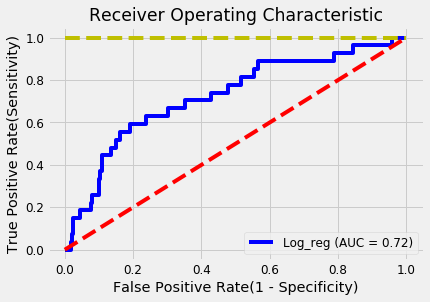

In [141]:
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Log_reg (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

- 열 삭제 전과 후의 차이 없음 

## @ 변수 중요도 파악 

In [129]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier(n_estimators=100, random_state=10, n_jobs=-1)

In [130]:
features = list(X_train.columns)

In [131]:
model.fit(X_train, y_train)

# feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importances.head(10)

,feature,importance
0,0,0.002726
1,1,0.001736
2,2,0.006266
3,3,0.000749
4,4,0.002711
5,6,0.001400
6,7,0.001363
7,8,0.001503
8,9,0.002214
9,10,0.002215


In [134]:
len(feature_importances)

474

In [132]:
def plot_feature_importances(df, n = 10, threshold = None):
    """Plots n most important features. Also plots the cumulative importance if
    threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances. 
    
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".
    
        n (int): Number of most important features to plot. Default is 15.
    
        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
    Returns:
        df (dataframe): Dataframe ordered by feature importances with a normalized column (sums to 1) 
                        and a cumulative importance column
    
    Note:
    
        * Normalization in this case means sums to 1. 
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of 0.9 will show the most important features needed to reach 90% of cumulative importance
    
    """
    plt.style.use('fivethirtyeight')
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'darkgreen', 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title('{} Most Important Features'.format(n), size = 18)
    plt.gca().invert_yaxis()
    
    
    if threshold:
        # Cumulative importance plot
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
        plt.title('Cumulative Feature Importance', size = 18);
        
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Add vertical line to plot
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
                                                                                  100 * threshold))
    
    return df

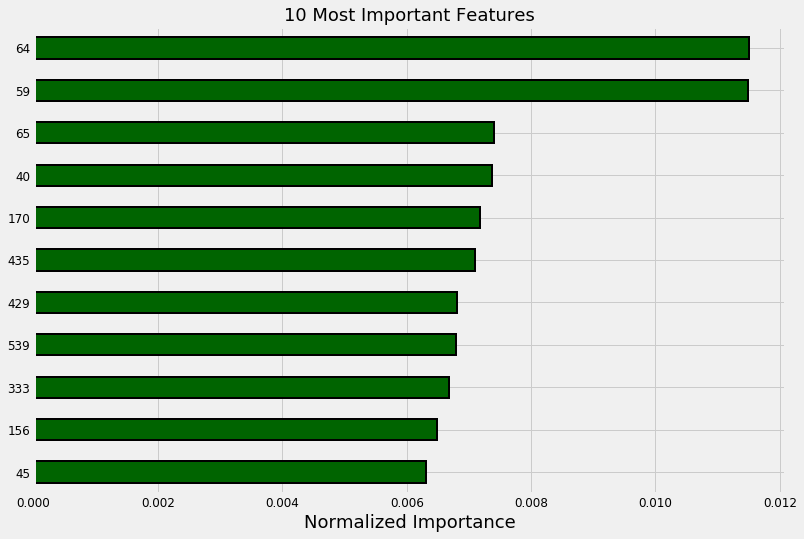

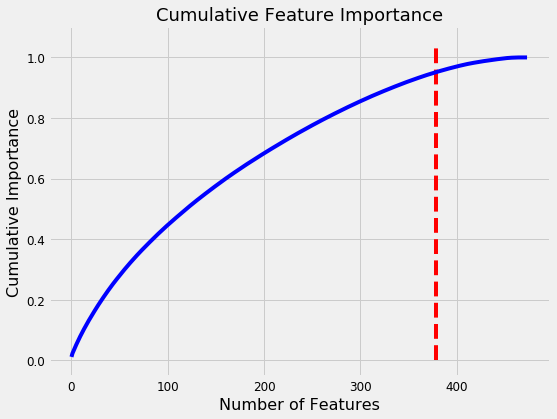

378 features required for 95% of cumulative importance.


In [133]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

180개 기능 중 106개 기능만 있으면 90%를 차지할 수 있다는 점이 흥미롭다. 이것은 우리가 몇몇 특징들을 제거할 수 있을지도 모른다는 것을 말해준다. 그러나, 특징적인 수입들은 우리에게 특징의 어느 방향이 중요한지 말해주지 않는다(예를 들어, 우리는 교육을 많이 받거나 적게 받는 것이 더 심각한 빈곤으로 이어지는지를 알려주기 위해 이것을 사용할 수 없다) 그들은 우리에게 관련성이 있다고 여겨지는 모델이 어떤 특징인지만 알려준다.

### 중요도 상위 400개가 있는 데이터 셋의 성능 평가 

In [143]:
tmp_df = data.copy()

In [145]:
feature_importances.head()

,feature,importance
0,0,0.002726
1,1,0.001736
2,2,0.006266
3,3,0.000749
4,4,0.002711


In [171]:
low_importance = []
low_importance = feature_importances.sort_values('importance', ascending = True).head(74)['feature']

In [178]:
low_feature_num = pd.DataFrame(low_importance)['feature']

In [179]:
data.drop(low_feature_num, axis='columns', inplace=True)

In [183]:
data.columns

Index(['0', '1', '2', '4', '6', '7', '8', '9', '10', '11',
       ...
       '579', '580', '582', '583', '584', '585', '586', '587', '588',
       'Pass/Fail'],
      dtype='object', length=401)

### 성능평가

In [215]:
X = data.loc[:,'0':'588']
y = data.loc[:,'Pass/Fail']

In [216]:
X.columns

Index(['0', '1', '2', '4', '6', '7', '8', '9', '10', '11',
       ...
       '578', '579', '580', '582', '583', '584', '585', '586', '587', '588'],
      dtype='object', length=400)

In [217]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size = 0.2, random_state=13)

In [218]:
log_reg = LogisticRegression(random_state=13,solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=13, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [219]:
y_pred = log_reg.predict(X_test)

In [220]:
roc_auc  = roc_auc_score(y_test, log_reg.decision_function(X_test))
roc_auc

0.7648728868241064

In [221]:
roc_auc1  = roc_auc_score(y_test, y_pred)
roc_auc1

0.5629758678539166

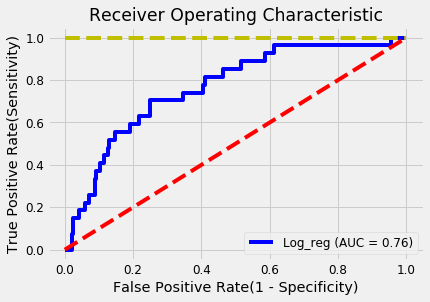

In [223]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc  = roc_auc_score(y_test, log_reg.decision_function(X_test))

# decision_function: 불확실성을 추정 = 확률로 표현 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_reg.decision_function(X_test))

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Log_reg (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

- 성능 올라감 !!! ( 확률로 추정한 기준 )
- 0.72 >> 0.76

In [193]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
  acc = accuracy_score(y_test, pred)
  pre = precision_score(y_test, pred)
  re = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  auc = roc_auc_score(y_test, pred)

  return acc, pre, re, f1, auc 

In [194]:
def print_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  acc, pre, re, f1, auc = get_clf_eval(y_test, pred)

  print('=> 오차행렬')
  print(confusion)
  print('=========')

  print('accuracy: {0:.4f}, precision: {1:.4f}'.format(acc,pre))
  print('recall: {0:.4f},F1: {1:.4f},AUC: {2:.4f}'.format(re,f1,auc))

In [195]:
print_clf_eval(y_test, y_pred)

=> 오차행렬
[[270  17]
 [ 22   5]]
accuracy: 0.8758, precision: 0.2273
recall: 0.1852,F1: 0.2041,AUC: 0.5630


- 여전히 불량에 대한 분류를 잘 못함! 
- 오버 샘플링은 필요해보임 
- 그러나 변수 간 상관관계 혹은 변수 조합 조사 후 오버 샘플링 할 예정
- 오버 샘플링 할 때 정상인 샘플의 수만큼 오버샘플링 하는게 아니라 
- 적당히 많게 오버 샘플링 진행을 할 것 

In [198]:
y_test.value_counts()

-1    287
 1     27
Name: Pass/Fail, dtype: int64

### 교차검증

In [234]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, X,y, cv=5, scoring='roc_auc')
scores

array([0.6494393 , 0.5694783 , 0.52202178, 0.55675147, 0.63664384])

In [236]:
np.mean(scores)

0.586866936498289

## @상관관계 조사 

In [237]:
# Create correlation matrix
corr_matrix = data.corr()

In [238]:
# select upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

In [243]:
# Find index of feature columns with correlation greate than 0.95
# 변수 간 상관관계 조사 = 서로 상관관계가 0.95보다 큰 column 뽑아내기 
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]
len(to_drop)

146

In [255]:
# corr_matrix.loc[corr_matrix['Pass/Fail'].abs() > 0.0, corr_matrix['Pass/Fail'].abs() > 0.0]

In [258]:
corr_matrix['Pass/Fail'].abs().sort_values(ascending=False).head(15)

Pass/Fail    1.000000
59           0.155771
103          0.151196
510          0.131587
348          0.130108
431          0.120304
434          0.111609
430          0.109569
435          0.108573
21           0.107997
436          0.106426
129          0.103351
210          0.102488
298          0.102055
163          0.099876
Name: Pass/Fail, dtype: float64

In [259]:
corr_matrix.loc[corr_matrix['Pass/Fail'].abs() > 0.1, corr_matrix['Pass/Fail'].abs() > 0.1]

,21,59,103,129,210,298,348,430,431,434,435,436,510,Pass/Fail
21,1.000000,-0.026307,0.022183,-0.078437,-0.003069,0.621514,-0.001649,0.674305,0.595582,0.631860,0.644550,0.638651,0.059851,0.107997
59,-0.026307,1.000000,0.287722,0.190543,0.137609,0.089933,0.142836,0.072240,0.095420,0.091144,0.085272,0.084576,0.217680,0.155771
103,0.022183,0.287722,1.000000,0.277127,0.126764,0.145362,0.153242,0.148998,0.169148,0.150095,0.148186,0.148108,0.609697,0.151196
129,-0.078437,0.190543,0.277127,1.000000,0.085650,0.026033,0.113664,0.053295,0.088214,0.050707,0.053475,0.055148,0.149298,0.103351
210,-0.003069,0.137609,0.126764,0.085650,1.000000,0.039999,0.949733,0.030914,0.048505,0.046410,0.046619,0.046244,0.066699,0.102488
298,0.621514,0.089933,0.145362,0.026033,0.039999,1.000000,0.044927,0.842164,0.825372,0.885728,0.860458,0.857012,0.141004,0.102055
348,-0.001649,0.142836,0.153242,0.113664,0.949733,0.044927,1.000000,0.037779,0.057312,0.050981,0.050440,0.049986,0.079128,0.130108
430,0.674305,0.072240,0.148998,0.053295,0.030914,0.842164,0.037779,1.000000,0.899213,0.948040,0.951673,0.953723,0.138906,0.109569
431,0.595582,0.095420,0.169148,0.088214,0.048505,0.825372,0.057312,0.899213,1.000000,0.933359,0.929544,0.932598,0.139180,0.120304
434,0.631860,0.091144,0.150095,0.050707,0.046410,0.885728,0.050981,0.948040,0.933359,1.000000,0.993665,0.992333,0.128726,0.111609


- 'Pass/Fail' 과 상관관계가 0.1 이상인 변수들 간의 상관관계

### 상관관계가 0.001 이하인 변수 제거 

In [276]:
corr_low_index = corr_matrix.loc[corr_matrix['Pass/Fail'].abs() < 0.001, corr_matrix['Pass/Fail'].abs() > 0.001].index

In [277]:
corr_low_index

Index(['2', '105', '108', '132', '291', '427', '429', '456'], dtype='object')

In [272]:
corr_data = data.copy()

In [278]:
corr_data.drop(corr_low_index, axis='columns', inplace=True)

### 성능평가 

In [281]:
X = corr_data.loc[:,'0':'588']
y = corr_data.loc[:,'Pass/Fail']

In [286]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size = 0.2, random_state=13)

log_reg = LogisticRegression(random_state=13,solver='liblinear')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

roc_auc  = roc_auc_score(y_test, log_reg.decision_function(X_test))
roc_auc

0.745128403664989

In [287]:
roc_auc1  = roc_auc_score(y_test, y_pred)
roc_auc1

0.5849787069299265

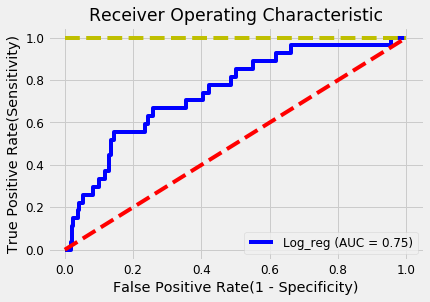

In [284]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc  = roc_auc_score(y_test, log_reg.decision_function(X_test))

# decision_function: 불확실성을 추정 = 확률로 표현 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_reg.decision_function(X_test))

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Log_reg (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

In [285]:
print_clf_eval(y_test, y_pred)

=> 오차행렬
[[272  15]
 [ 21   6]]
accuracy: 0.8854, precision: 0.2857
recall: 0.2222,F1: 0.2500,AUC: 0.5850


In [288]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, X,y, cv=5, scoring='roc_auc')
scores

array([0.64440111, 0.55631399, 0.48577929, 0.54435747, 0.61369863])

In [289]:
np.mean(scores)

0.568910098426205

- auc 성능 저하. but 불량을 불량으로 맞추는 건수가 1개 늘음

- 상관관계가 낮은 변수를 제거 하기 보다는 변수 간 상관관계가 높은 변수 쌍 중 하나를 제거하는 게 필요해보임 

### 변수 간 상관관계 조사 

In [290]:
to_drop

['27',
 '104',
 '105',
 '106',
 '127',
 '140',
 '148',
 '152',
 '165',
 '249',
 '271',
 '272',
 '274',
 '275',
 '277',
 '280',
 '281',
 '282',
 '283',
 '285',
 '286',
 '287',
 '288',
 '289',
 '290',
 '291',
 '293',
 '294',
 '295',
 '296',
 '297',
 '298',
 '299',
 '300',
 '301',
 '302',
 '303',
 '304',
 '305',
 '306',
 '308',
 '310',
 '311',
 '318',
 '319',
 '321',
 '323',
 '324',
 '332',
 '333',
 '335',
 '338',
 '339',
 '340',
 '341',
 '343',
 '344',
 '346',
 '349',
 '350',
 '351',
 '352',
 '354',
 '355',
 '359',
 '360',
 '361',
 '362',
 '363',
 '365',
 '366',
 '377',
 '386',
 '387',
 '388',
 '389',
 '391',
 '392',
 '405',
 '406',
 '407',
 '408',
 '409',
 '410',
 '411',
 '415',
 '416',
 '417',
 '420',
 '421',
 '424',
 '425',
 '426',
 '427',
 '428',
 '429',
 '435',
 '436',
 '437',
 '440',
 '441',
 '442',
 '444',
 '446',
 '453',
 '455',
 '456',
 '457',
 '459',
 '467',
 '469',
 '470',
 '475',
 '477',
 '479',
 '490',
 '491',
 '493',
 '494',
 '495',
 '497',
 '519',
 '520',
 '522',
 '523',
 

In [292]:
corr_matrix.loc[corr_matrix['27'].abs() > 0.8, corr_matrix['27'].abs() > 0.8]

,25,27
25,1.000000,0.980375
27,0.980375,1.000000


In [296]:
corr_matrix['Pass/Fail']['25']

-0.03637940636792051

In [297]:
corr_matrix['Pass/Fail']['27']

-0.029205821139617994

- '25' 보다 Pass/Fail과의 상관관계가 작은 변수 '27' 제거 

In [ ]:
for i in to_drop:
    corr_matrix.loc[corr_matrix[i].abs() > 0.9, corr_matrix[i].abs() > 0.9]